## EDA for data books

This project was idealized because of my great passion of buying data science books. Let's see if we can find some insights from the data we collected from the amazon.com.br site

In [2]:
from pathlib import Path
from dotenv import load_dotenv
import psycopg2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
env_path = Path('amazon_ds_books/.env')        # Reads from .env file so that the token doesnt need to be written on the script
load_dotenv(dotenv_path= env_path)

True

In [38]:
conn = psycopg2.connect(database="amazon_ds",
                        user= os.environ['POST_USER'], password=  os.environ['POST_PASS'],
                        host='localhost', port='5432'
)

In [39]:
query = '''
SELECT * FROM DS_BOOKS_MODEL
'''

In [40]:
df = pd.read_sql(query, conn)

In [41]:
df

,description,price,rating,review_count,url,popularity,rating_num,price_num
0,Data science para negócios: O que você precisa...,"R$ 62,90","4,7 de 5 estrelas",6570,https://www.amazon.com.br/Data-Science-para-ne...,POPULAR,4.7,62.90
1,Data Science Do Zero: Noções Fundamentais com ...,"R$ 59,90","4,7 de 5 estrelas",1310,https://www.amazon.com.br/Data-Science-Do-Zero...,POPULAR,4.7,59.90
2,Data Science from Scratch: First Principles wi...,"R$ 254,24","4,4 de 5 estrelas",4370,https://www.amazon.com.br/Data-Science-Scratch...,POPULAR,4.4,254.24
3,Data Science for Business: What You Need to Kn...,"R$ 261,85","4,5 de 5 estrelas",7160,https://www.amazon.com.br/Data-Science-Busines...,POPULAR,4.5,261.85
4,Data Science do Zero: Primeiras Regras com o P...,"R$ 56,61","4,5 de 5 estrelas",6400,https://www.amazon.com.br/Data-Science-Zero-Pr...,POPULAR,4.5,56.61
...,...,...,...,...,...,...,...,...
1037,Better Data Visualizations: A Guide for Schola...,"R$ 126,29","4,3 de 5 estrelas",1070,https://www.amazon.com.br/Better-Data-Visualiz...,POPULAR,4.3,126.29
1038,Data Wise: Guia para o Uso de Evidências na Ed...,"R$ 65,99","4,6 de 5 estrelas",160,https://www.amazon.com.br/Data-Wise-Guia-Evid%...,NOT POPULAR,4.6,65.99
1039,"R for Data Science: Import, Tidy, Transform, V...","R$ 228,57","4,7 de 5 estrelas",1075,https://www.amazon.com.br/R-Data-Science-Garre...,POPULAR,4.7,228.57
1040,PYTHON: Learn Coding Programs with Python Prog...,"R$ 0,00","3,8 de 5 estrelas",590,https://www.amazon.com.br/PYTHON-Programs-Prog...,POPULAR,3.8,0.00


In [42]:
df.head()

,description,price,rating,review_count,url,popularity,rating_num,price_num
0,Data science para negócios: O que você precisa...,"R$ 62,90","4,7 de 5 estrelas",6570,https://www.amazon.com.br/Data-Science-para-ne...,POPULAR,4.7,62.90
1,Data Science Do Zero: Noções Fundamentais com ...,"R$ 59,90","4,7 de 5 estrelas",1310,https://www.amazon.com.br/Data-Science-Do-Zero...,POPULAR,4.7,59.90
2,Data Science from Scratch: First Principles wi...,"R$ 254,24","4,4 de 5 estrelas",4370,https://www.amazon.com.br/Data-Science-Scratch...,POPULAR,4.4,254.24
3,Data Science for Business: What You Need to Kn...,"R$ 261,85","4,5 de 5 estrelas",7160,https://www.amazon.com.br/Data-Science-Busines...,POPULAR,4.5,261.85
4,Data Science do Zero: Primeiras Regras com o P...,"R$ 56,61","4,5 de 5 estrelas",6400,https://www.amazon.com.br/Data-Science-Zero-Pr...,POPULAR,4.5,56.61


In [43]:
df.describe()

,review_count,rating_num,price_num
count,1042.000000,1042.000000,1042.000000
mean,2518.863724,4.583493,117.824779
std,2412.293459,0.248871,113.285278
min,10.000000,3.700000,0.000000
25%,620.000000,4.500000,56.610000
50%,1890.000000,4.600000,69.300000
75%,3060.000000,4.700000,186.260000
max,9410.000000,5.000000,718.530000


<AxesSubplot:>

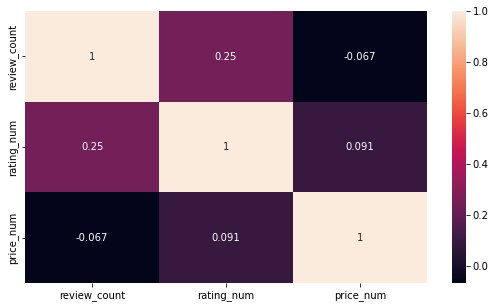

In [44]:
plt.figure(figsize= (9,5))
sns.heatmap(df.corr(), annot=True)

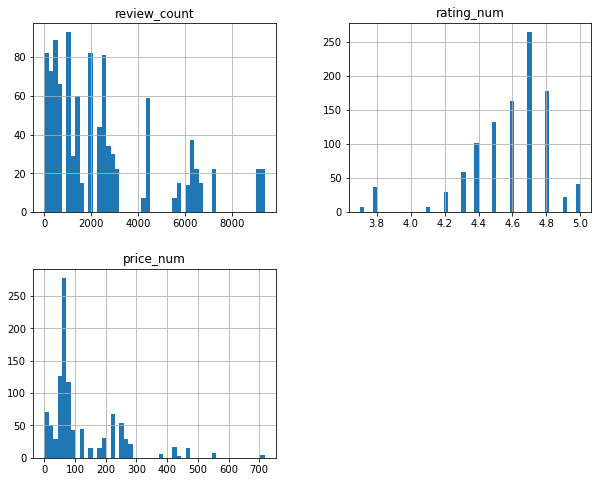

In [45]:
df.hist(bins=50, figsize=(10,8)) 
plt.show()

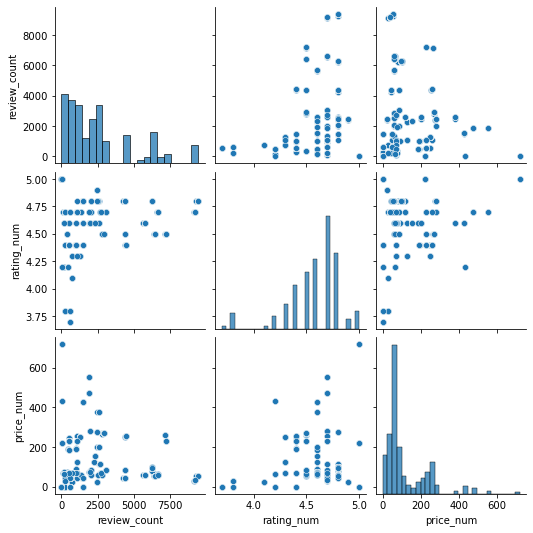

In [46]:
sns.pairplot(data=df)

In [47]:
df[df['price_num']==df['price_num'].max()].head(1)

,description,price,rating,review_count,url,popularity,rating_num,price_num
48,Introduction to Probability for Data Science,"R$ 718,53","5,0 de 5 estrelas",40,https://www.amazon.com.br/Introduction-Probabi...,NOT POPULAR,5.0,718.53


In [48]:
df[df['price_num']==df['price_num'].min()].head(5)

,description,price,rating,review_count,url,popularity,rating_num,price_num
8,Data Science for Beginners: 4 Books in 1 — Mas...,"R$ 0,00","4,4 de 5 estrelas",1490,https://www.amazon.com.br/Data-Science-Beginne...,POPULAR,4.4,0.0
29,PYTHON: Learn Coding Programs with Python Prog...,"R$ 0,00","3,7 de 5 estrelas",570,https://www.amazon.com.br/PYTHON-Programs-Prog...,POPULAR,3.7,0.0
41,"Data Science, GDPR e LGPD: 20 coisas que você ...","R$ 0,00","4,2 de 5 estrelas",190,https://www.amazon.com.br/Data-Science-GDPR-LG...,NOT POPULAR,4.2,0.0
43,Manual Prático de Data Science,"R$ 0,00","4,4 de 5 estrelas",280,https://www.amazon.com.br/Manual-Pr%C3%A1tico-...,POPULAR,4.4,0.0
59,Data Science for Beginners: 4 Books in 1 — Mas...,"R$ 0,00","4,4 de 5 estrelas",1490,https://www.amazon.com.br/Data-Science-Beginne...,POPULAR,4.4,0.0


In [49]:
df[df['review_count']==df['review_count'].max()].head(1)

,description,price,rating,review_count,url,popularity,rating_num,price_num
360,"Estatística: O que é, para que serve, como fun...","R$ 53,90","4,8 de 5 estrelas",9410,https://www.amazon.com.br/Estat%C3%ADstica-par...,POPULAR,4.8,53.9
